In [60]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [61]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MrJel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MrJel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MrJel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
df = pd.read_csv('bbc_text_cls.csv')

In [63]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [64]:
inputs = df['text']
labels = df['labels']

<Axes: >

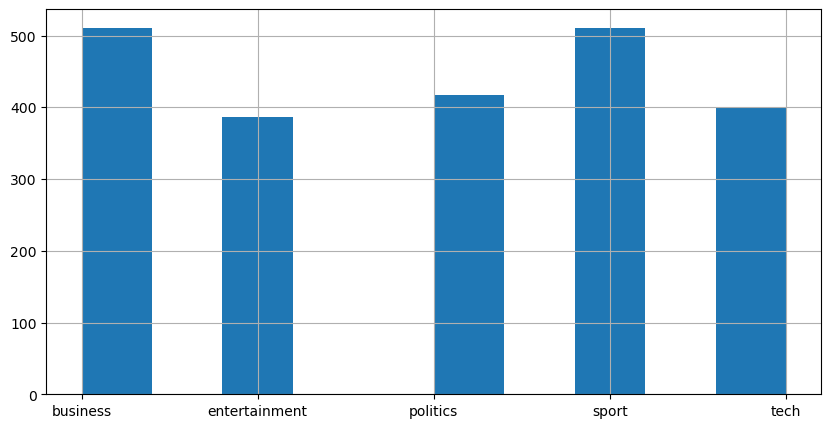

In [65]:
labels.hist(figsize = (10, 5))

In [66]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state = 123)

In [67]:
inputs_test

717     Duran Duran show set for US TV\n\nChart stars ...
798     Musicians to tackle US red tape\n\nMusicians' ...
1330    Merritt close to indoor 400m mark\n\nTeenager ...
18      India widens access to telecoms\n\nIndia has r...
1391    Wada will appeal against ruling\n\nThe World A...
                              ...                        
1636    Leeds v Saracens (Fri)\n\nHeadingley\n\nFriday...
1422    Kenyon denies Robben Barca return\n\nChelsea c...
1982    Freeze on anti-spam campaign\n\nA campaign by ...
2005    Mobile gig aims to rock 3G\n\nForget about goi...
550     No ads for Passion Oscar campaign\n\nProducer ...
Name: text, Length: 557, dtype: object

In [68]:
vectorizer = CountVectorizer()

In [69]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [70]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

Spare representation is usefull because of 0's values

In [71]:
# See how many non 0's values it has:
# total values
(Xtrain != 0).sum()

337411

In [72]:
# Porcentage of values that are not 0:

(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [73]:
multinomialNB_model = MultinomialNB()

multinomialNB_model.fit(Xtrain, Ytrain)
print("train score: ", multinomialNB_model.score(Xtrain, Ytrain))
print("test score: ", multinomialNB_model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [74]:
# Using stopwords :)
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
multinomialNB_model = MultinomialNB()

multinomialNB_model.fit(Xtrain, Ytrain)
print("train score: ", multinomialNB_model.score(Xtrain, Ytrain))
print("test score: ", multinomialNB_model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9766606822262118


Using Lemmatization:

In [75]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [86]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        
        return [self.wnl.lemmatize(word, pos = get_wordnet_pos(tag)) \
                for word,tag in words_and_tags]
    
    

In [87]:
# Lemmatization
vectorizer = CountVectorizer(tokenizer = LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(Xtrain, Ytrain)

print("train score: ", multinomialNB_model.score(Xtrain, Ytrain))
print("test score: ", multinomialNB_model.score(Xtest, Ytest))

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9922062350119905
test score:  0.9676840215439856


In [89]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
        
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(word) for word in tokens]
        

In [90]:
vectorizer = CountVectorizer(tokenizer = StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(Xtrain, Ytrain)

print("train score: ", multinomialNB_model.score(Xtrain, Ytrain))
print("test score: ", multinomialNB_model.score(Xtest, Ytest))

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9892086330935251
test score:  0.9694793536804309


In [91]:
def simple_tokenizer(s):
    return s.split()

In [92]:
vectorizer = CountVectorizer(tokenizer = simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(Xtrain, Ytrain)

print("train score: ", multinomialNB_model.score(Xtrain, Ytrain))
print("test score: ", multinomialNB_model.score(Xtest, Ytest))

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9952038369304557
test score:  0.9712746858168761


In [94]:
Xtrain

<1668x52144 sparse matrix of type '<class 'numpy.int64'>'
	with 369097 stored elements in Compressed Sparse Row format>

## Vector similarity

---


* Cosine similarity -> Cosine of the vectors
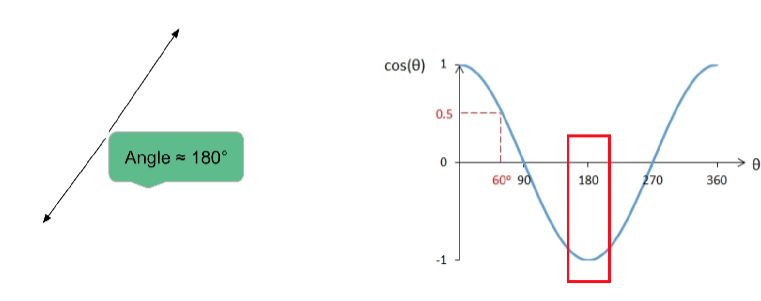

* Cosine Distance = 1 - cosine similarity

You can have papers with the same similarityies, as vectors talking about the same

## TF - IDF

---

* Imporve Count Vectortizer
* TF-IDF is popular for document retrieval and text mining


-> Used fot words that we want to ignore appear in many different documents
   they wont help us differentiate betwen documents, for ex: stopwords 'the'

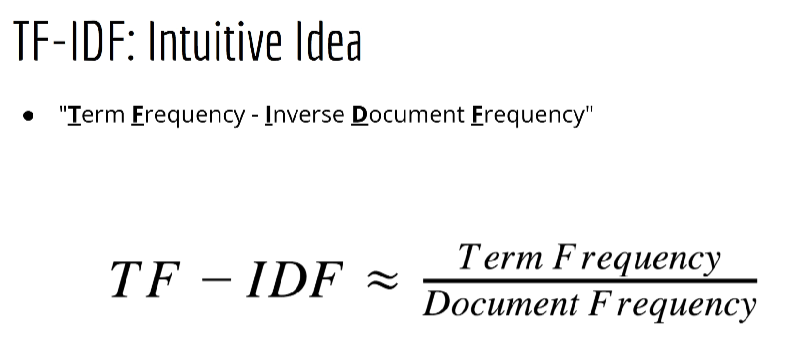

Here is a variation:

t = term

d = document

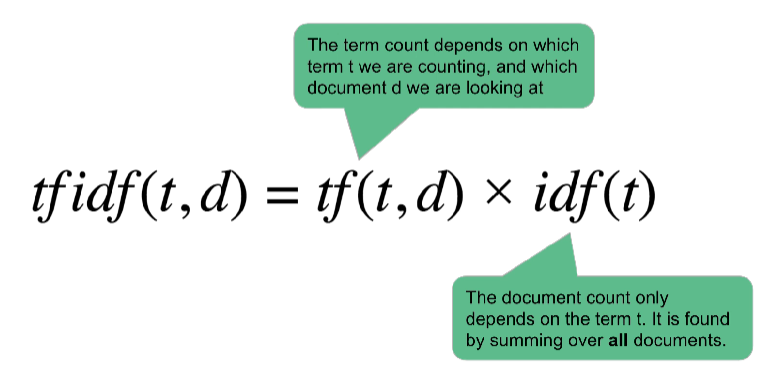
